## Visualization of 2 Parameter Weibull plots

In [1]:
import warnings
warnings.filterwarnings('ignore')
from reliability.Distributions import Weibull_Distribution
from reliability.Probability_plotting import Weibull_probability_plot
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parameters (Real underlying parameters)
n_potential_failures = 120  # Generate a larger pool of potential failures
mileage_limit_1 = 100000
mileage_limit_2 = 150000
shape1_real = 1.5
scale1_real = 100000
shape2_real = 1.5
scale2_real = 150000

In [3]:
# Generate the random potential failures ONCE
potential_failures = np.random.weibull(a=shape1_real, size=n_potential_failures) * scale1_real

# First graph (100K miles observation limit - Probability Plot)
uncensored1 = potential_failures[potential_failures <= mileage_limit_1]
right_censored1 = potential_failures[potential_failures > mileage_limit_1]
fit1 = Fit_Weibull_2P(failures=uncensored1, right_censored=right_censored1, CI_type=None, show_probability_plot=False)

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 77/43 (35.83333% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          148178         17846.2    117022    187629
     Beta        0.960226       0.0927623   0.79459   1.16039 

Goodness of fit    Value
 Log-likelihood -993.061
           AICc  1990.22
            BIC   1995.7
             AD  257.118 



Labels for the first graph: ['Data (100K Limit)']


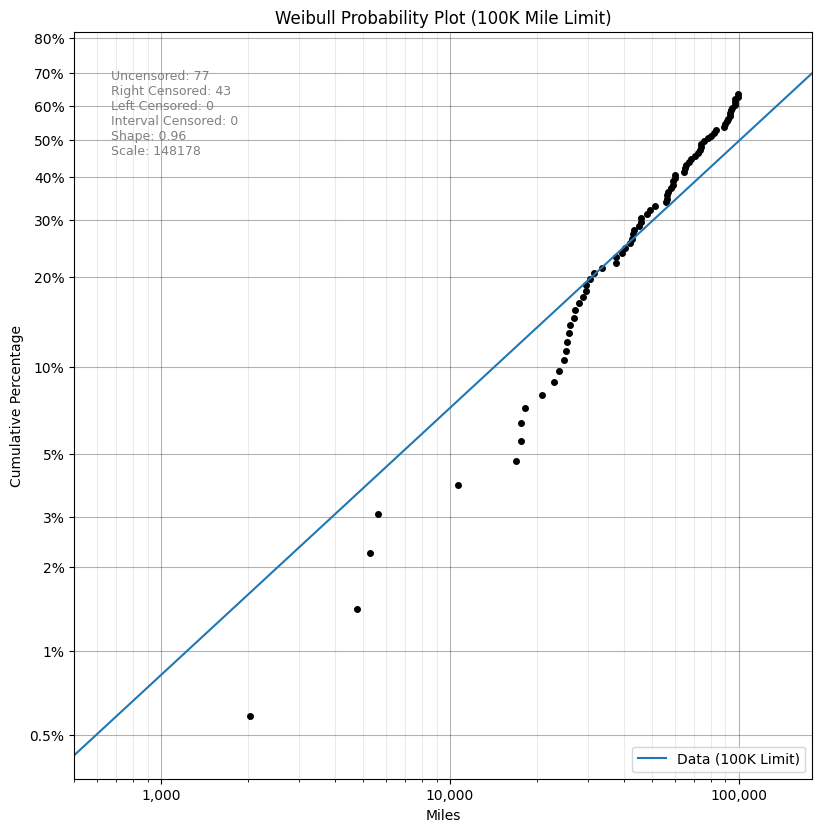

In [4]:
Weibull_probability_plot(failures=uncensored1, right_censored=right_censored1, label='Data (100K Limit)', CI_type=None)
plt.title('Weibull Probability Plot (100K Mile Limit)', loc='center')
plt.text(0.05, 0.95, f'Uncensored: {len(uncensored1)}\nRight Censored: {len(right_censored1)}\nLeft Censored: 0\nInterval Censored: 0\nShape: {fit1.beta:.2f}\nScale: {fit1.alpha:.0f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='gray')
plt.xlabel('Miles')
plt.ylabel('Cumulative Percentage')
plt.xscale('log')
plt.xticks([1000, 10000, 100000, 200000], ['1,000', '10,000', '100,000', '200,000'])
plt.xlim(500, mileage_limit_2 * 1.2) # Use a common xlim
handles, labels = plt.gca().get_legend_handles_labels()
print(f"Labels for the first graph: {labels}") # Print the labels
if 'Right Censored' in labels:
    labels[labels.index('Right Censored')] = 'Right Censored (100K Limit)' # Manually relabel
plt.legend(handles, labels, loc='lower right')
plt.show()

In [5]:
# Second graph (150K miles observation limit - Probability Plot)
uncensored2 = potential_failures[potential_failures <= mileage_limit_2]
right_censored2 = potential_failures[potential_failures > mileage_limit_2]
fit2 = Fit_Weibull_2P(failures=uncensored2, right_censored=right_censored2, CI_type=None, show_probability_plot=False)

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 99/21 (17.5% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          115692         10198.4   97334.7    137511
     Beta         1.14618       0.0938814  0.976189   1.34578 

Goodness of fit    Value
 Log-likelihood -1250.73
           AICc  2505.56
            BIC  2511.03
             AD  79.4504 



Labels for the second graph: ['Data (150K Limit)']


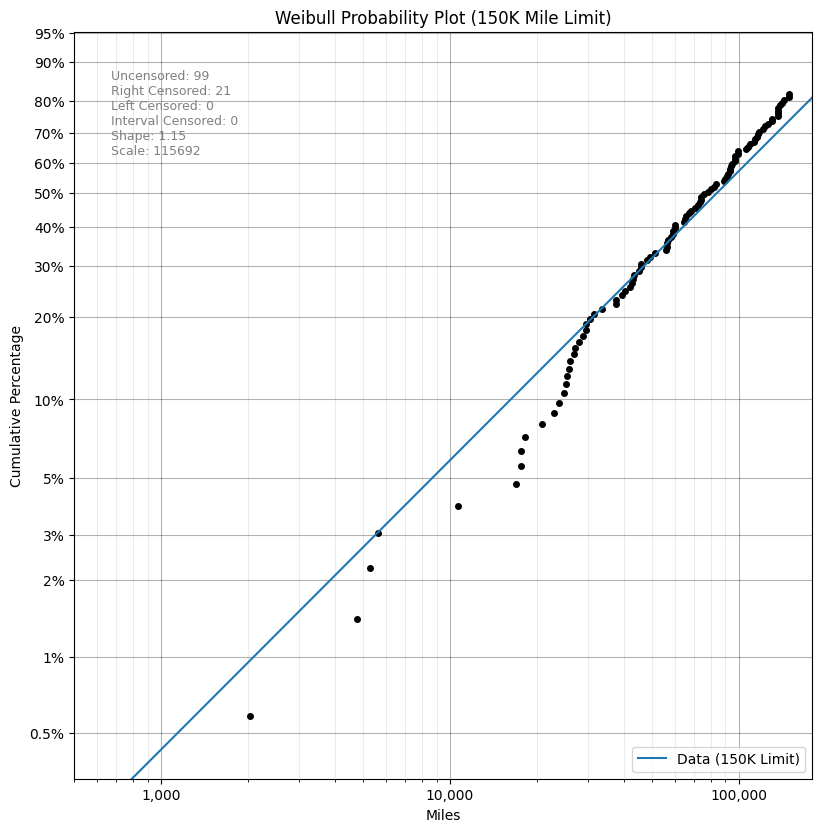

In [6]:
Weibull_probability_plot(failures=uncensored2, right_censored=right_censored2, label='Data (150K Limit)', CI_type=None)
plt.title('Weibull Probability Plot (150K Mile Limit)', loc='center')
plt.text(0.05, 0.95, f'Uncensored: {len(uncensored2)}\nRight Censored: {len(right_censored2)}\nLeft Censored: 0\nInterval Censored: 0\nShape: {fit2.beta:.2f}\nScale: {fit2.alpha:.0f}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='gray')
plt.xlabel('Miles')
plt.ylabel('Cumulative Percentage')
plt.xscale('log')
plt.xticks([1000, 10000, 100000, 200000], ['1,000', '10,000', '100,000', '200,000'])
plt.xlim(500, mileage_limit_2 * 1.2) # Use a common xlim
handles, labels = plt.gca().get_legend_handles_labels()
print(f"Labels for the second graph: {labels}") # Print the labels
if 'Right Censored' in labels:
    labels[labels.index('Right Censored')] = 'Right Censored (150K Limit)' # Manually relabel
plt.legend(handles, labels, loc='lower right')
plt.show()